<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1. - Menentukan parameter K, bilangan bulat positif sebagai nearest neighbours.
  - Menghitung jarak antara data baru dan semua data yang ada di data training.
  - Menentukan K tetangga terdekat berdasarkan jarak minimum.
  - Tetangga yang memiliki frekuensi terbanyak diambil sebagai nilai prediksi atau hasil klasifikasi data baru tersebut.


2. - Sangat sensitif terhadap data pencilan (outlier).
  - Jika K genap, KNN akan kebingungan semisal label tetangga terdekat memiliki jumlah sama.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [33]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Uniform Score = [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]

Distance Score = [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


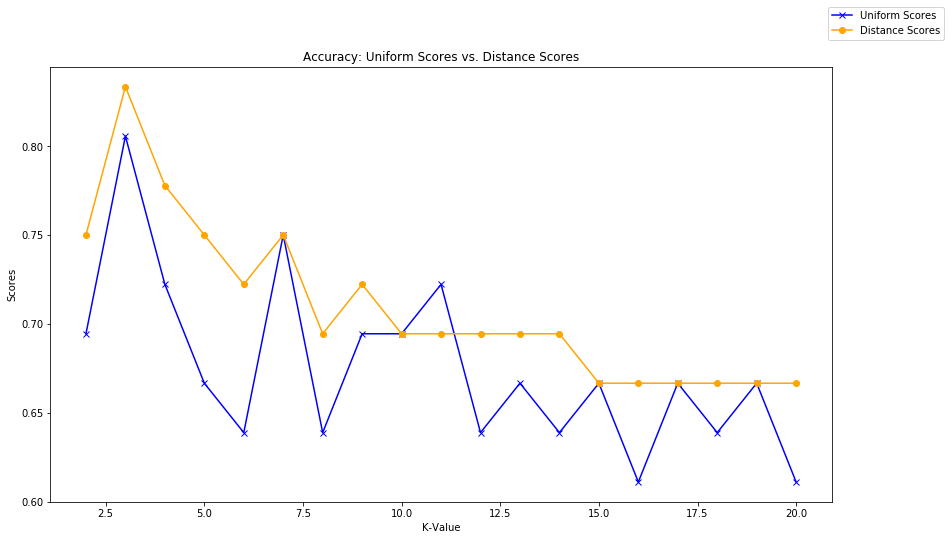

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (14, 8))

y_test = list(y_test)
list_uniform_score = []
list_distance_score = []

def model_KNN (k, weight):
    model_knn = KNeighborsClassifier(n_neighbors = k, weights = weight)
    model_knn.fit(X_train, y_train)
    y_hasil = model_knn.predict(X_test)
    
    hasil = 0
    for i in range(len(y_hasil)):
        if int(y_hasil[i] == y_test[i]):
            hasil += 1
    
    return hasil / len(y_hasil)

for i in range(2, 21):
    list_uniform_score.append(model_KNN(i, 'uniform'))
    
for i in range(2, 21):
    list_distance_score.append(model_KNN(i, 'distance'))

print(f'Uniform Score = {list_uniform_score}\n')
print(f'Distance Score = {list_distance_score}')
    
ax.plot(list(range(2, 21)), list_uniform_score, color = 'blue', marker = 'x', label = 'Uniform Scores')
ax.plot(list(range(2, 21)), list_distance_score, color = 'orange', marker = 'o', label = 'Distance Scores')

ax.set_title('Accuracy: Uniform Scores vs. Distance Scores')
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.15, 1.15))
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [18]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

print(f'Parameter Koefisien = {regressor.coef_}\n')
print(f'Parameter Intercept = {regressor.intercept_}')

Parameter Koefisien = [ 1.5 -5.   9.  10. ]

Parameter Intercept = 0.5000000016247697
